Signal matrix shape: (125, 1651)
Shape of the final stacked image: (2500, 1651)


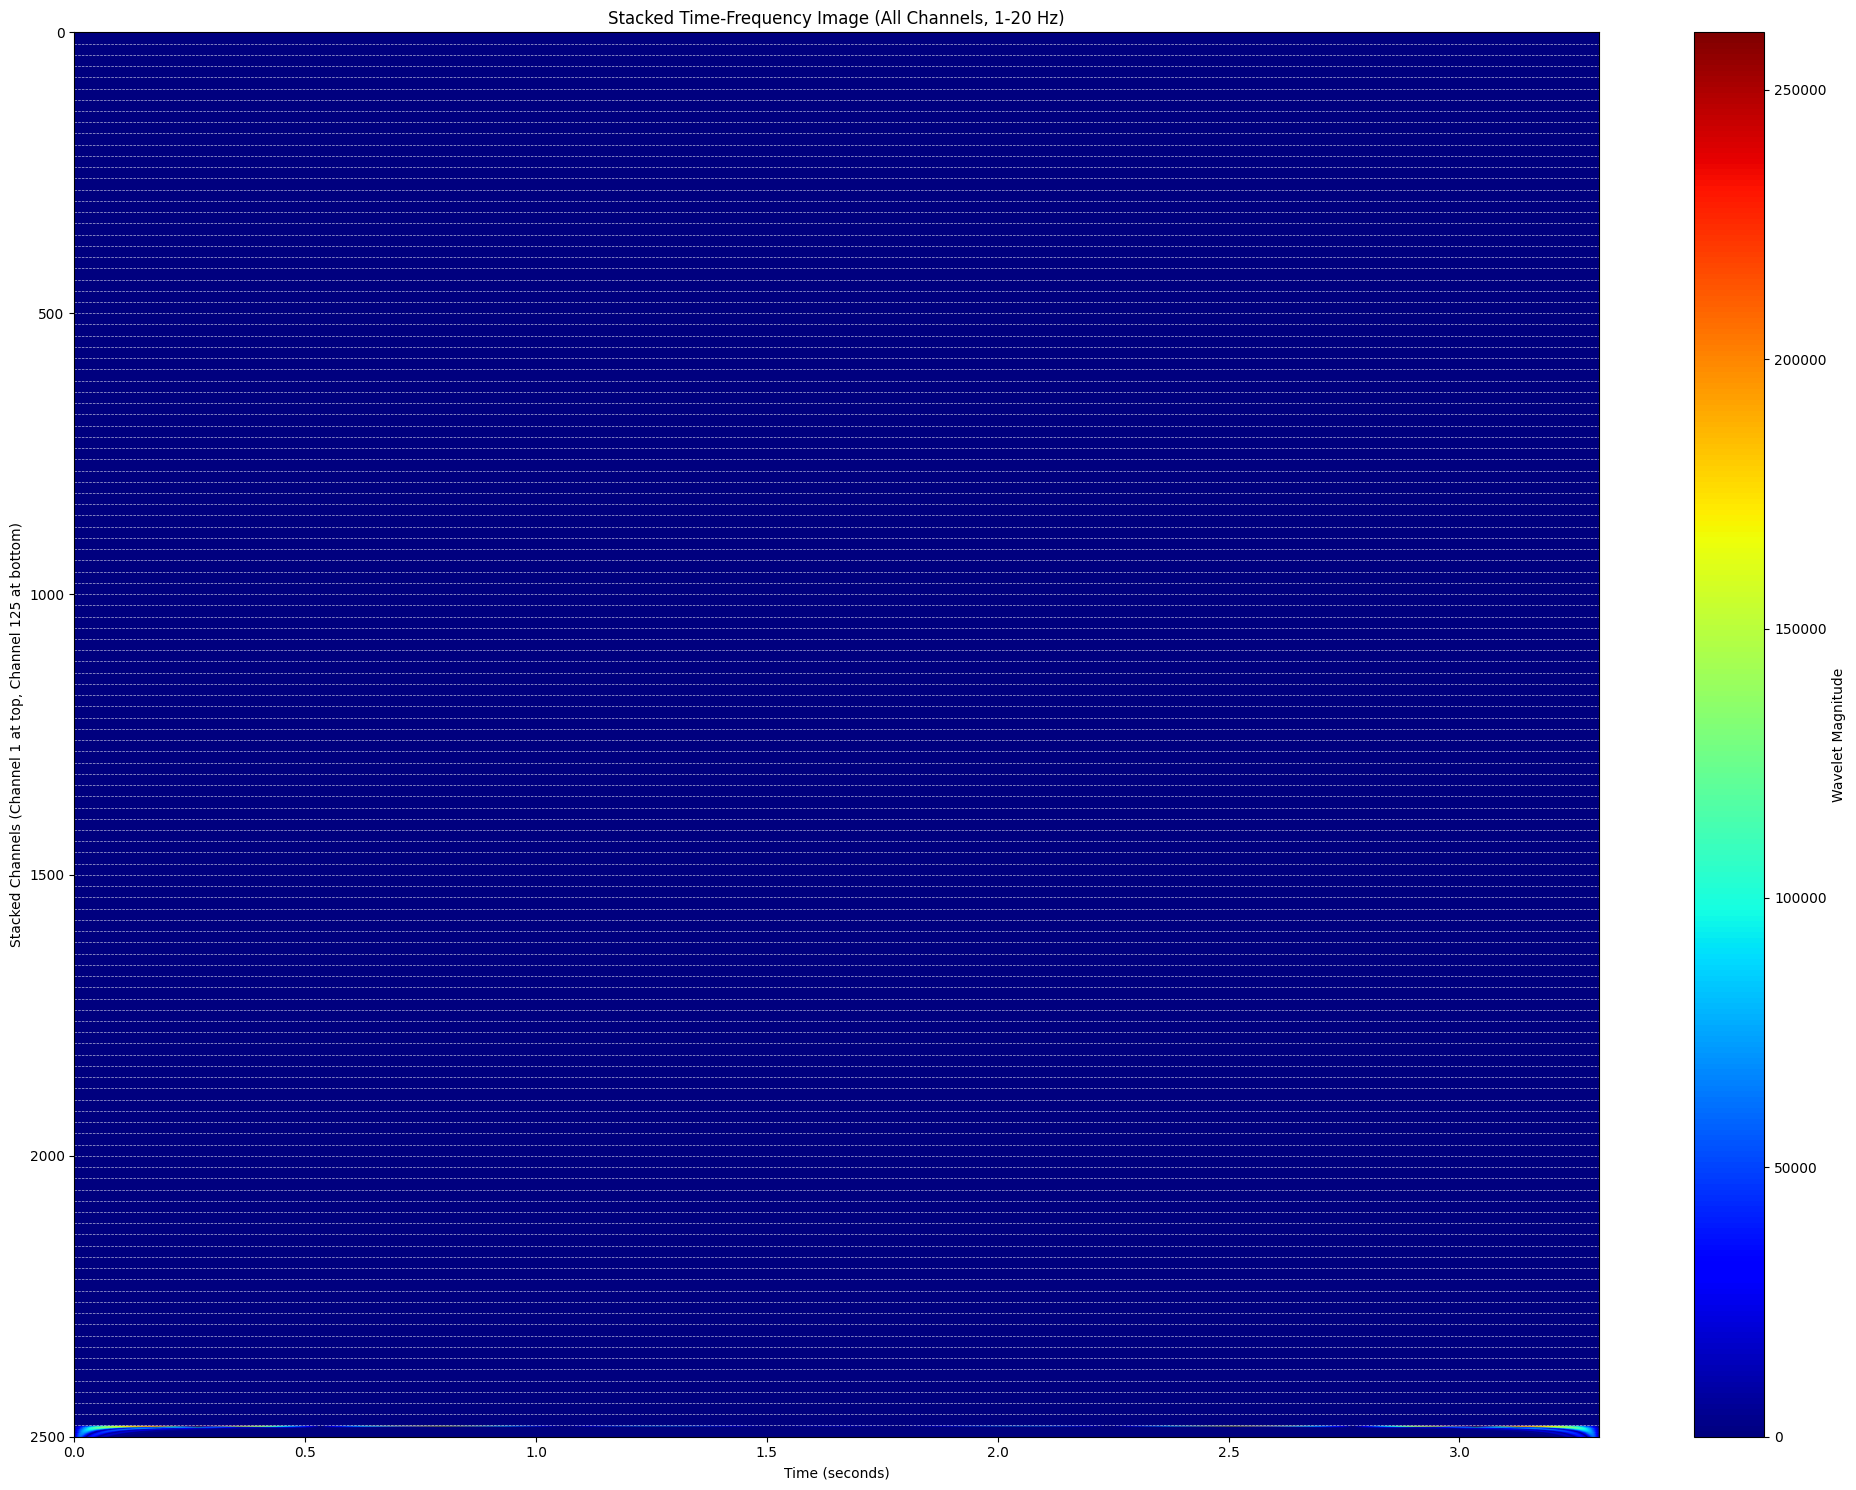

In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load and prepare the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze the data to ensure it's 2D: (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print(f"Signal matrix shape: {signal_matrix.shape}") # Should be (125, 1651)

# --- 2. Define Wavelet Parameters ---
sfreq = 500
fmin, fmax, n_freqs = 1, 20, 20
wavelet_name = 'morl'
freqs = np.linspace(fmin, fmax, n_freqs)
scales = pywt.central_frequency(wavelet_name) * sfreq / freqs

# --- 3. Process each channel individually and collect the images ---
list_of_channel_images = []
# Loop through each of the 125 channels
for channel_signal in signal_matrix:
    # Perform CWT on the current channel signal
    coeffs, _ = pywt.cwt(channel_signal, scales, wavelet_name, sampling_period=1.0/sfreq)
    
    # Get the magnitude (the "image") for this channel and add it to our list
    magnitude_image = np.abs(coeffs)
    list_of_channel_images.append(magnitude_image)

# --- 4. Stack all the channel images vertically ---
# This takes the 125 images (each 20x1651) and stacks them "one upon another"
stacked_image = np.vstack(list_of_channel_images)
print(f"Shape of the final stacked image: {stacked_image.shape}") # Should be (2500, 1651)

# --- 5. Visualize the final stacked image ---
plt.figure(figsize=(20, 15))
plt.imshow(stacked_image, aspect='auto', cmap='jet', 
           extent=[0, stacked_image.shape[1]/sfreq, stacked_image.shape[0], 0])
plt.colorbar(label='Wavelet Magnitude')
plt.title('Stacked Time-Frequency Image (All Channels, 1-20 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Stacked Channels (Channel 1 at top, Channel 125 at bottom)')

# Add horizontal lines to show the boundary between each channel's image
for i in range(1, signal_matrix.shape[0]):
    plt.axhline(y=i * n_freqs, color='w', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

Full signal matrix shape: (125, 1651)
Selected Channel 0, Signal Shape: (1651,)
CWT coefficients shape: (30, 1651)


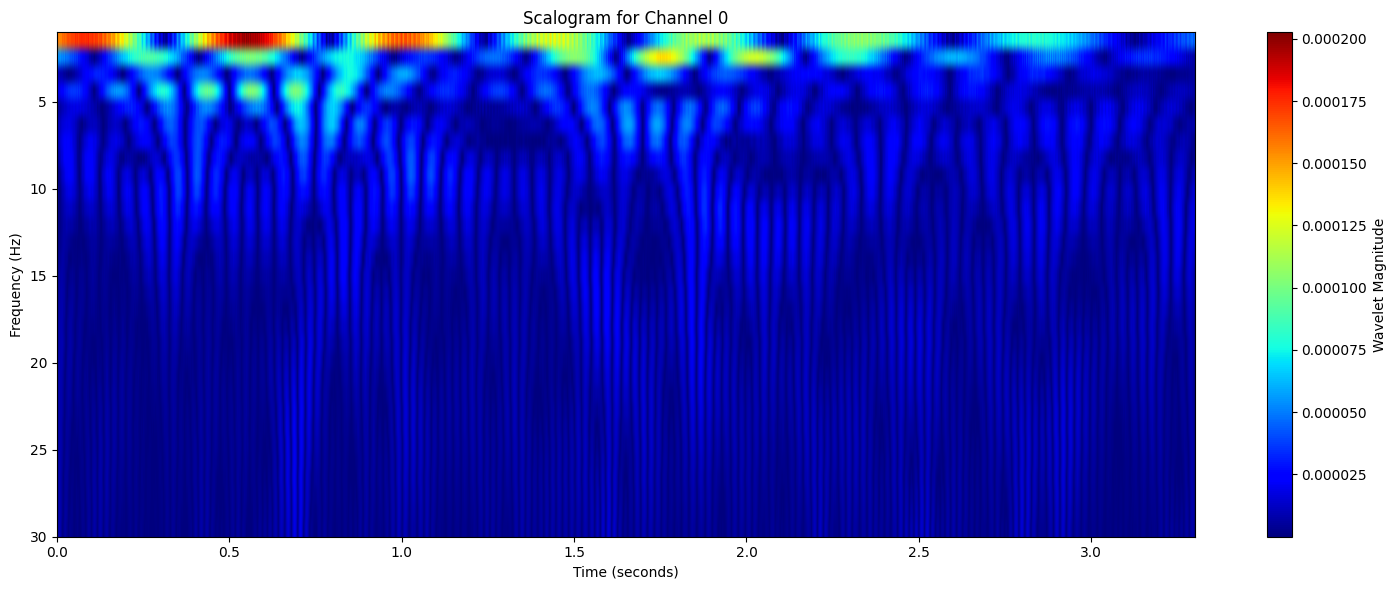

In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to remove any batch dimension of 1, ensuring shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Select a single channel for plotting ---
channel_idx = 0  # You can change this to plot a different channel (e.g., 10, 50)
signal = signal_matrix[channel_idx]
print(f"Selected Channel {channel_idx}, Signal Shape: {signal.shape}")

# --- 3. Define CWT Parameters ---
sfreq = 500
wavelet_name = 'morl'
# Define the frequency range for the analysis (1 to 30 Hz)
frequencies_to_plot = np.linspace(1, 30, 30)
# Convert frequencies to scales for the CWT function
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 4. Compute the Continuous Wavelet Transform (CWT) ---
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coefficients shape:", coeffs.shape)

# --- 5. Plot the Scalogram (Time-Frequency Representation) ---
plt.figure(figsize=(15, 6))
plt.imshow(
    np.abs(coeffs),  # Use the magnitude of the coefficients
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]], # Set axes limits
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram for Channel {channel_idx}')
plt.tight_layout()
plt.show()

Signal matrix shape: (125, 1651)
Shape of the final stacked scalogram: (3750, 1651)


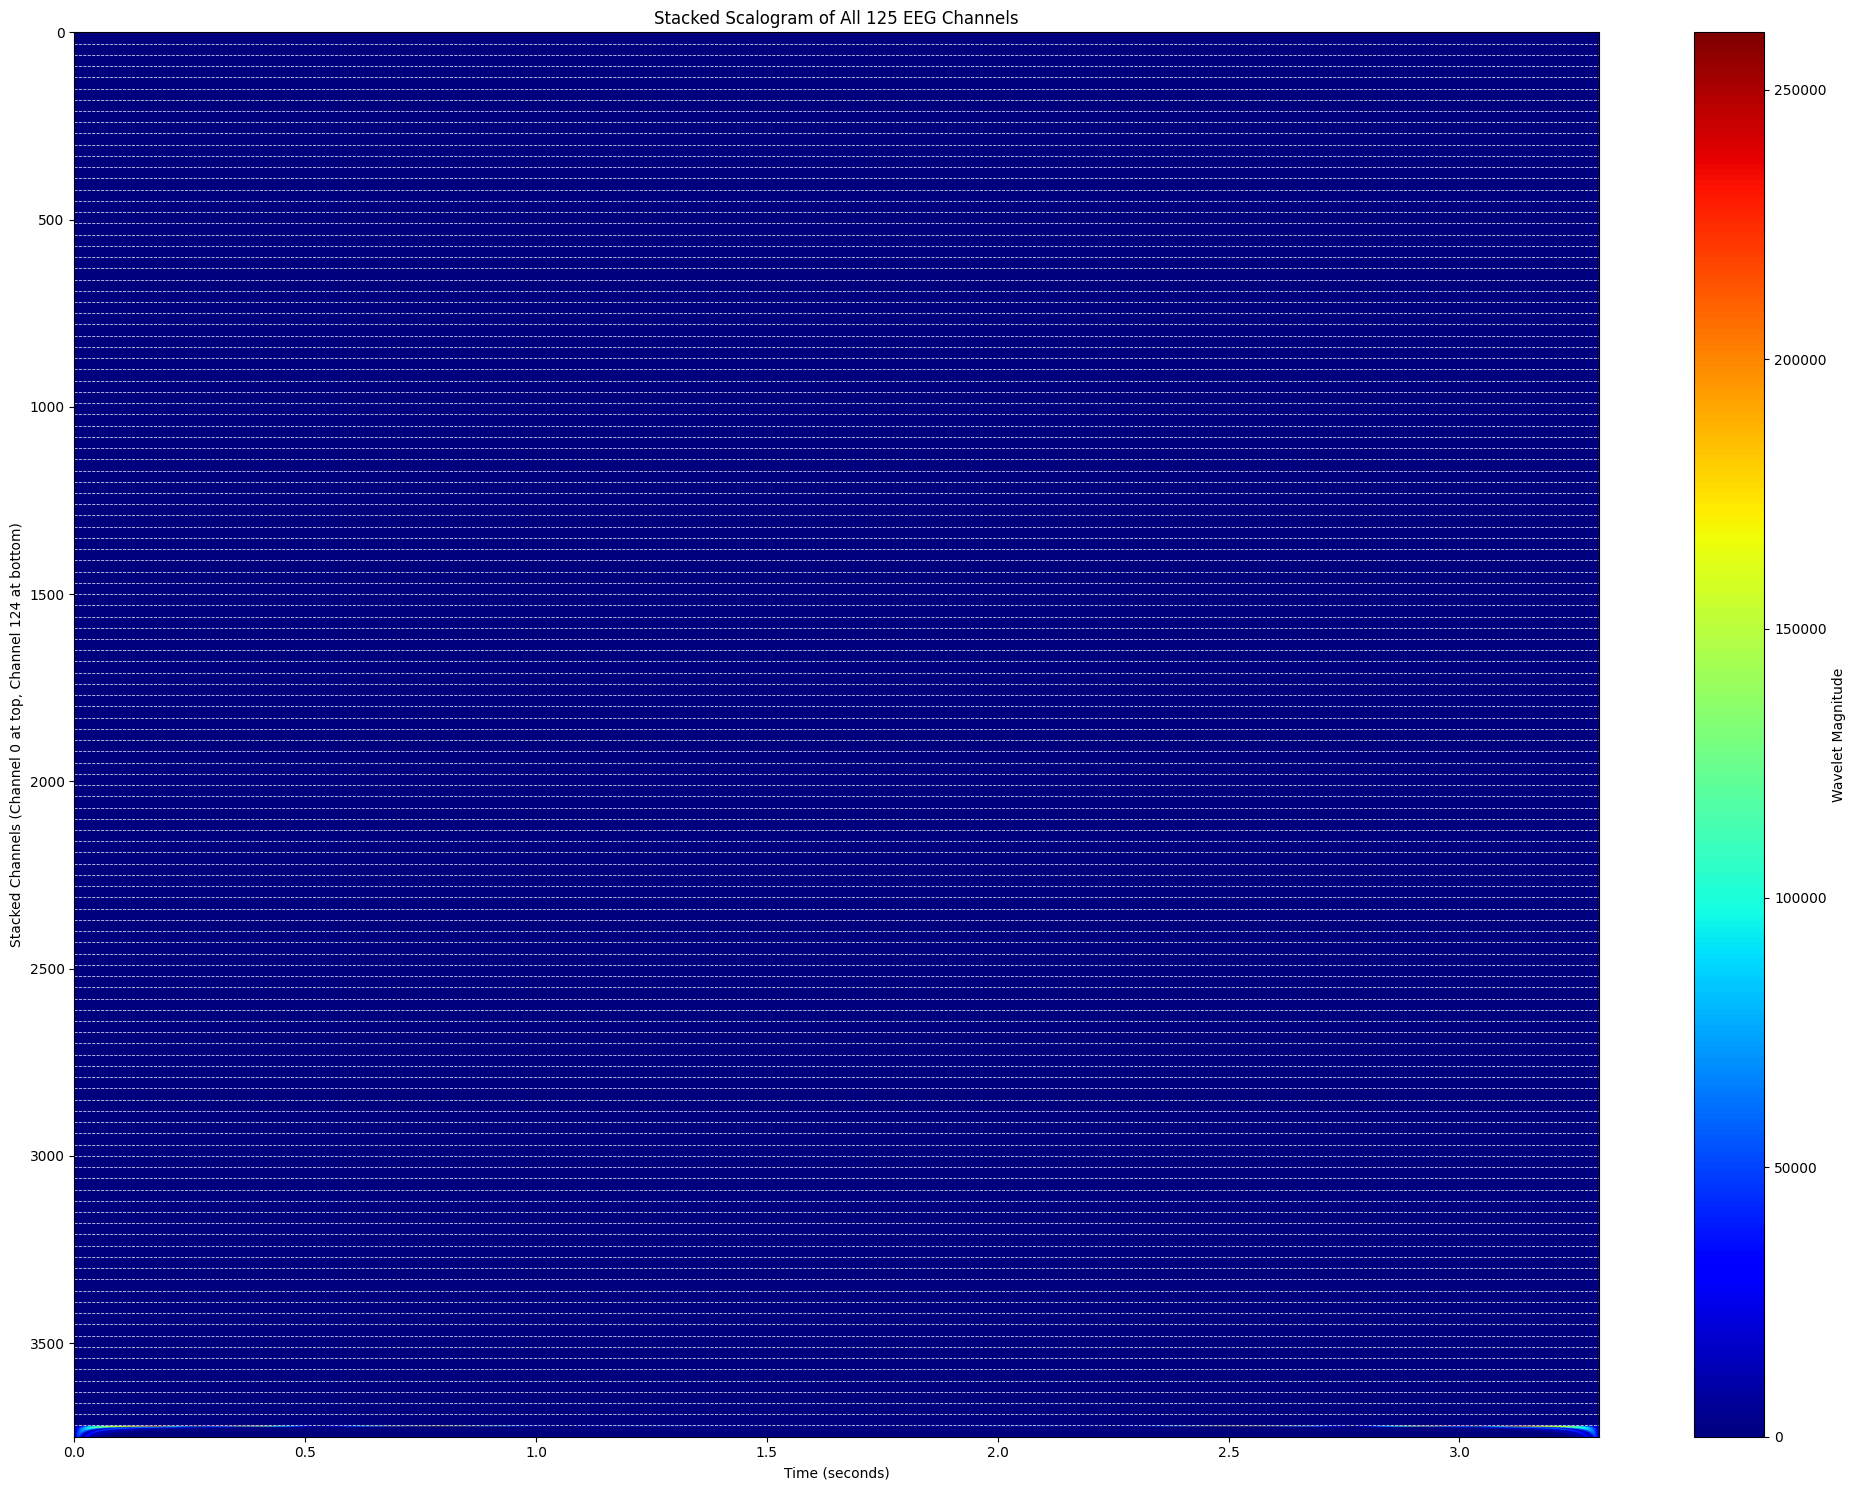

In [4]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to ensure the shape is (125, n_samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print(f"Signal matrix shape: {signal_matrix.shape}")

# --- 2. Define CWT Parameters ---
sfreq = 500
wavelet_name = 'morl'
# We'll create a 30Hz scalogram for each channel
frequencies_to_plot = np.linspace(1, 30, 30)
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 3. Create a scalogram for each channel and collect them ---
list_of_scalograms = []
# Loop through each of the 125 channels in the signal_matrix
for channel_signal in signal_matrix:
    # Compute the CWT for the current channel
    coeffs, _ = pywt.cwt(channel_signal, scales, wavelet_name, sampling_period=1/sfreq)
    
    # Get the magnitude (the scalogram) and add it to our list
    scalogram = np.abs(coeffs)
    list_of_scalograms.append(scalogram)

# --- 4. Stack all 125 scalograms vertically ("one upon another") ---
stacked_scalogram = np.vstack(list_of_scalograms)
print(f"Shape of the final stacked scalogram: {stacked_scalogram.shape}")

# --- 5. Visualize the final stacked scalogram ---
plt.figure(figsize=(20, 15))
plt.imshow(
    stacked_scalogram,
    aspect='auto',
    cmap='jet',
    extent=[0, signal_matrix.shape[1]/sfreq, stacked_scalogram.shape[0], 0]
)
plt.colorbar(label='Wavelet Magnitude')
plt.title('Stacked Scalogram of All 125 EEG Channels')
plt.xlabel('Time (seconds)')
plt.ylabel('Stacked Channels (Channel 0 at top, Channel 124 at bottom)')

# Add horizontal lines to visually separate each channel's scalogram
num_channels = signal_matrix.shape[0]
num_freqs = len(frequencies_to_plot)
for i in range(1, num_channels):
    plt.axhline(y=i * num_freqs, color='w', linestyle='--', linewidth=0.6, alpha=0.8)

plt.tight_layout()

Number of trials loaded: 185
Signal matrix shape: (125, 1651)
Shape of the final stacked scalogram: (625, 1651)


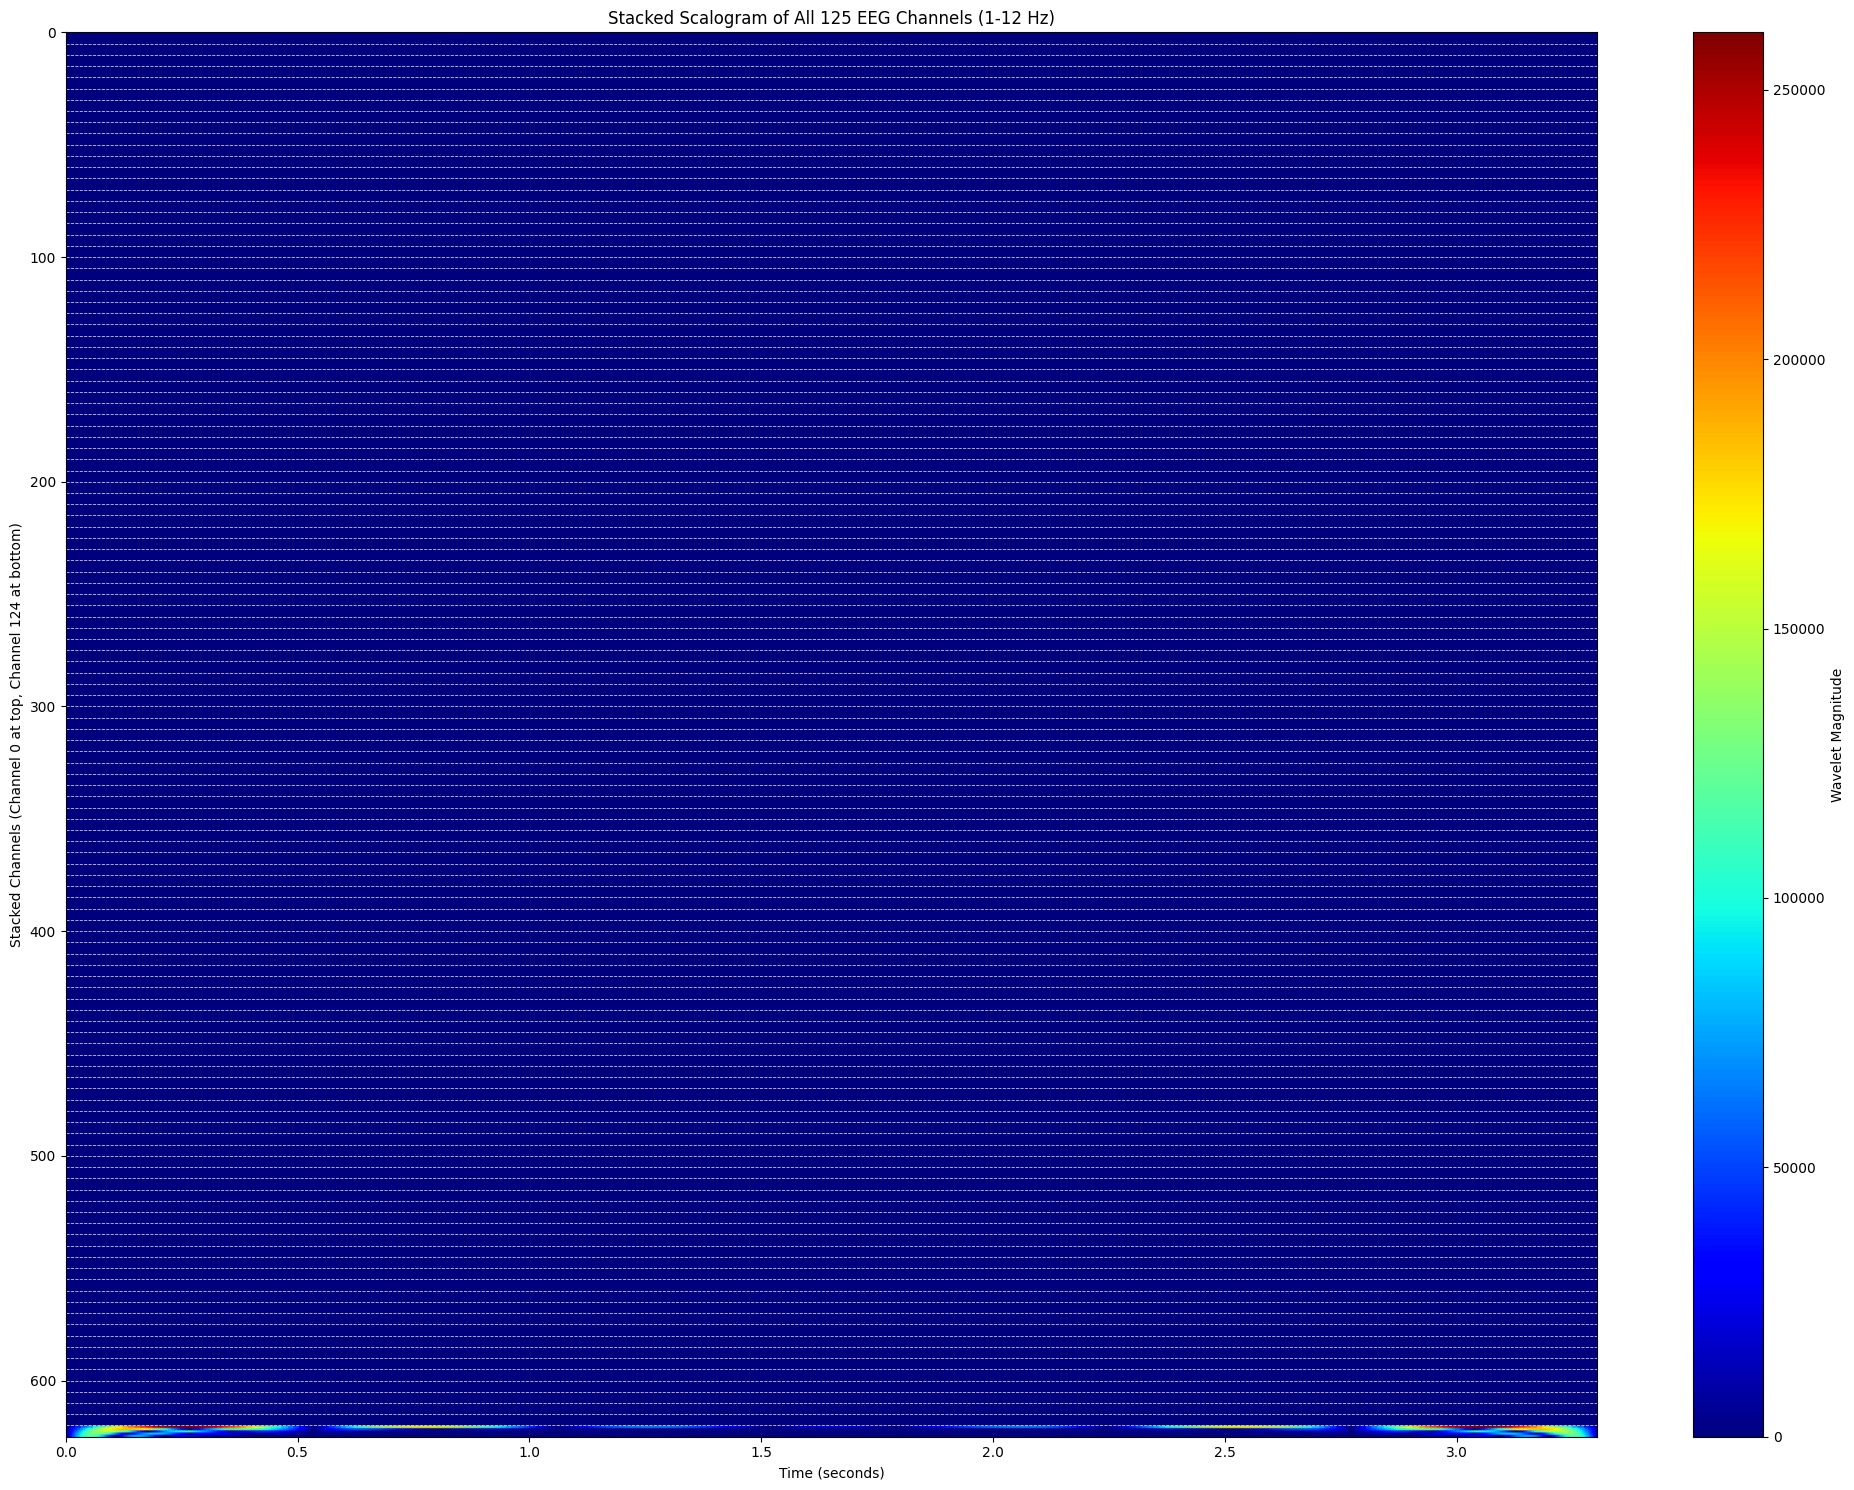

In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
print(f"Number of trials loaded: {len(trials)}")
# Squeeze to ensure the shape is (125, n_samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print(f"Signal matrix shape: {signal_matrix.shape}")

# --- 2. Define CWT Parameters ---
sfreq = 500
wavelet_name = 'morl'
# We'll create a 1-5Hz scalogram for each channel
frequencies_to_plot = np.linspace(1, 5, 5) # <-- CHANGED THIS LINE
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 3. Create a scalogram for each channel and collect them ---
list_of_scalograms = []
# Loop through each of the 125 channels in the signal_matrix
for channel_signal in signal_matrix:
    # Compute the CWT for the current channel
    coeffs, _ = pywt.cwt(channel_signal, scales, wavelet_name, sampling_period=1/sfreq)
    
    # Get the magnitude (the scalogram) and add it to our list
    scalogram = np.abs(coeffs)
    list_of_scalograms.append(scalogram)

# --- 4. Stack all 125 scalograms vertically ("one upon another") ---
stacked_scalogram = np.vstack(list_of_scalograms)
print(f"Shape of the final stacked scalogram: {stacked_scalogram.shape}")

# --- 5. Visualize the final stacked scalogram ---
plt.figure(figsize=(20, 15))
plt.imshow(
    stacked_scalogram,
    aspect='auto',
    cmap='jet',
    extent=[0, signal_matrix.shape[1]/sfreq, stacked_scalogram.shape[0], 0]
)
plt.colorbar(label='Wavelet Magnitude')
plt.title('Stacked Scalogram of All 125 EEG Channels (1-12 Hz)') # <-- Updated Title
plt.xlabel('Time (seconds)')
plt.ylabel('Stacked Channels (Channel 0 at top, Channel 124 at bottom)')

# Add horizontal lines to visually separate each channel's scalogram
num_channels = signal_matrix.shape[0]
num_freqs = len(frequencies_to_plot)
for i in range(1, num_channels):
    plt.axhline(y=i * num_freqs, color='w', linestyle='--', linewidth=0.6, alpha=0.8)

plt.tight_layout()
plt.show()

Full signal matrix shape: (125, 1651)
Selected Channel 0, Signal Shape: (1651,)
CWT coefficients shape: (10, 1651)


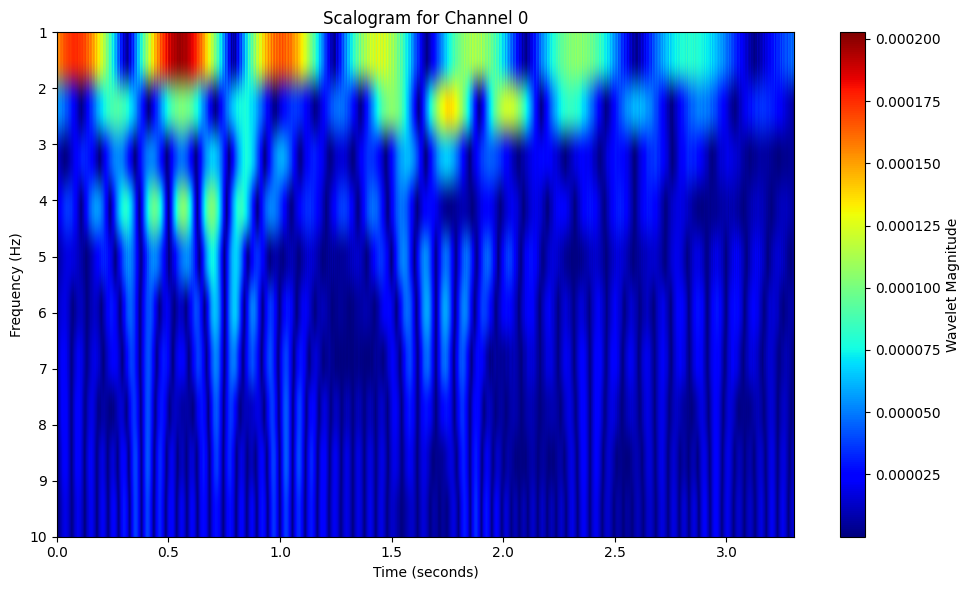

Full signal matrix shape: (125, 1651)
Selected Channel 1, Signal Shape: (1651,)
CWT coefficients shape: (10, 1651)


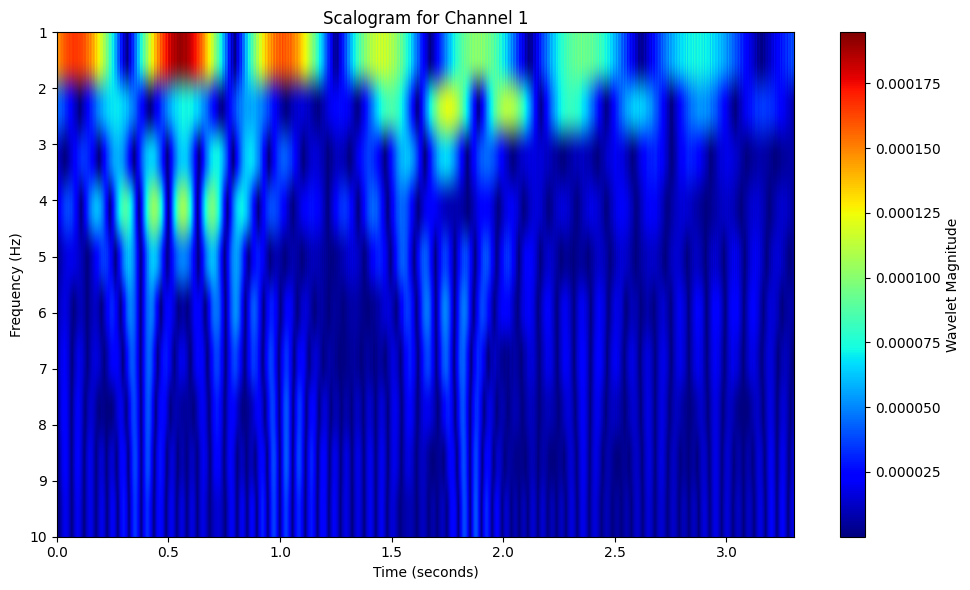

Full signal matrix shape: (125, 1651)
Selected Channel 2, Signal Shape: (1651,)
CWT coefficients shape: (10, 1651)


TypeError: Invalid shape (3, 10, 1651) for image data

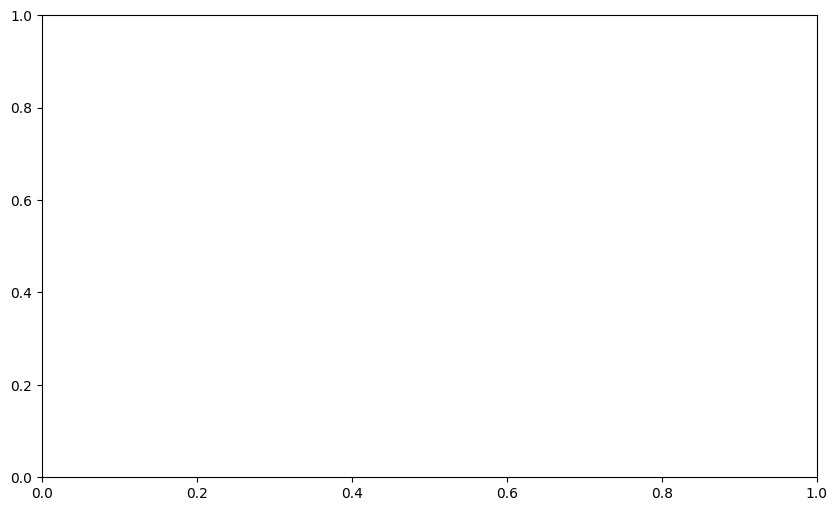

In [6]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to remove any batch dimension of 1, ensuring shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Select a single channel for plotting ---
channel_idx = 0  # You can change this to plot a different channel (e.g., 10, 50)
signal = signal_matrix[channel_idx]
print(f"Selected Channel {channel_idx}, Signal Shape: {signal.shape}")

# --- 3. Define CWT Parameters ---
sfreq = 500
wavelet_name = 'morl'
# Define the frequency range for the analysis (1 to 30 Hz)
frequencies_to_plot = np.linspace(1, 10, 10)
# Convert frequencies to scales for the CWT function
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 4. Compute the Continuous Wavelet Transform (CWT) ---
coeffs1, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coefficients shape:", coeffs1.shape)

# --- 5. Plot the Scalogram (Time-Frequency Representation) ---
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(coeffs1),  # Use the magnitude of the coefficients
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]], # Set axes limits
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram for Channel {channel_idx}')
plt.tight_layout()
plt.show()

# Squeeze to remove any batch dimension of 1, ensuring shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Select a single channel for plotting ---
channel_idx = 1  # You can change this to plot a different channel (e.g., 10, 50)
signal = signal_matrix[channel_idx]
print(f"Selected Channel {channel_idx}, Signal Shape: {signal.shape}")

# --- 3. Define CWT Parameters ---
sfreq = 500
wavelet_name = 'morl'
# Define the frequency range for the analysis (1 to 15 Hz)
frequencies_to_plot = np.linspace(1, 10, 10)
# Convert frequencies to scales for the CWT function
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 4. Compute the Continuous Wavelet Transform (CWT) ---
coeffs2, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coefficients shape:", coeffs2.shape)

# --- 5. Plot the Scalogram (Time-Frequency Representation) ---
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(coeffs2),  # Use the magnitude of the coefficients
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]], # Set axes limits
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram for Channel {channel_idx}')
plt.tight_layout()
plt.show()

# Squeeze to remove any batch dimension of 1, ensuring shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Select a single channel for plotting ---
channel_idx = 2  # You can change this to plot a different channel (e.g., 10, 50)
signal = signal_matrix[channel_idx]
print(f"Selected Channel {channel_idx}, Signal Shape: {signal.shape}")

# --- 3. Define CWT Parameters ---
sfreq = 500
wavelet_name = 'morl'
# Define the frequency range for the analysis (1 to 10 Hz)
frequencies_to_plot = np.linspace(1, 10, 10)
# Convert frequencies to scales for the CWT function
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 4. Compute the Continuous Wavelet Transform (CWT) ---
coeffs3, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coefficients shape:", coeffs3.shape)

signals = []
signals.append(np.abs(coeffs1))  # Store the magnitude of the coefficients
signals.append(np.abs(coeffs2))  # Store the magnitude of the coefficients
signals.append(np.abs(coeffs3))  # Store the magnitude of the coefficients
# --- 5. Plot the Scalogram (Time-Frequency Representation) ---
plt.figure(figsize=(10, 6))
plt.imshow(
    signals,  # Use the magnitude of the coefficients
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]], # Set axes limits
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram for Channel {channel_idx}')
plt.tight_layout()
plt.show()

Full signal matrix shape: (125, 1651)
Processing Channel 0...
Processing Channel 1...
Processing Channel 2...
Processing Channel 3...
Processing Channel 4...
Shape of the final stacked scalogram: (40, 1651)


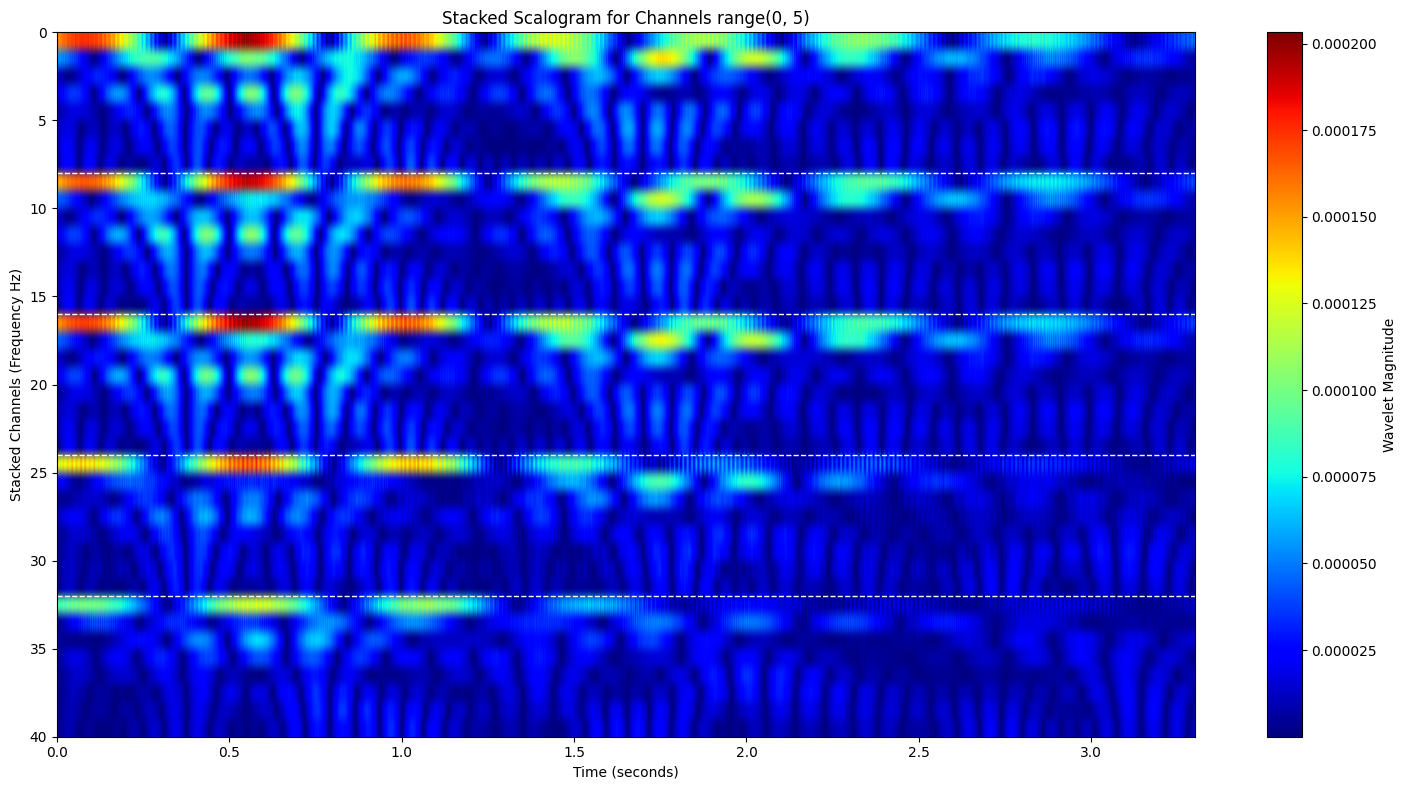

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ONCE ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to ensure the shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Define CWT Parameters ONCE ---
sfreq = 500
wavelet_name = 'morl'
frequencies_to_plot = np.linspace(1, 8, 8)
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 3. Compute scalograms for the first 3 channels and collect them ---
list_of_scalograms = []
channels_to_plot = range(0, 5)  # You can change this to plot specific channels, e.g., [0, 1, 2]

for channel_idx in channels_to_plot:
    signal = signal_matrix[channel_idx]
    print(f"Processing Channel {channel_idx}...")
    
    # Compute the CWT for the current channel
    coeffs, _ = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
    
    # Get the magnitude (the scalogram) and add it to our list
    scalogram = np.abs(coeffs)
    list_of_scalograms.append(scalogram)

# --- 4. Stack the 3 scalograms vertically into a single image ---
stacked_scalogram = np.vstack(list_of_scalograms)
print(f"Shape of the final stacked scalogram: {stacked_scalogram.shape}")

# --- 5. Plot the final stacked image ---
plt.figure(figsize=(15, 8))
plt.imshow(
    stacked_scalogram,  # Plot the single stacked image
    extent=[0, signal_matrix.shape[1]/sfreq, len(channels_to_plot) * frequencies_to_plot[-1], 0],
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Stacked Channels (Frequency Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Stacked Scalogram for Channels {channels_to_plot}')

# Add lines to separate the channels
num_freqs = len(frequencies_to_plot)
for i in range(1, len(channels_to_plot)):
    plt.axhline(y=i * num_freqs, color='w', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

Full signal matrix shape: (125, 1651)
Processing Channel 0...
Processing Channel 1...
Processing Channel 2...
Processing Channel 3...
Processing Channel 4...
Processing Channel 5...
Processing Channel 6...
Processing Channel 7...
Processing Channel 8...
Processing Channel 9...
Shape of the final stacked scalogram: (100, 1651)


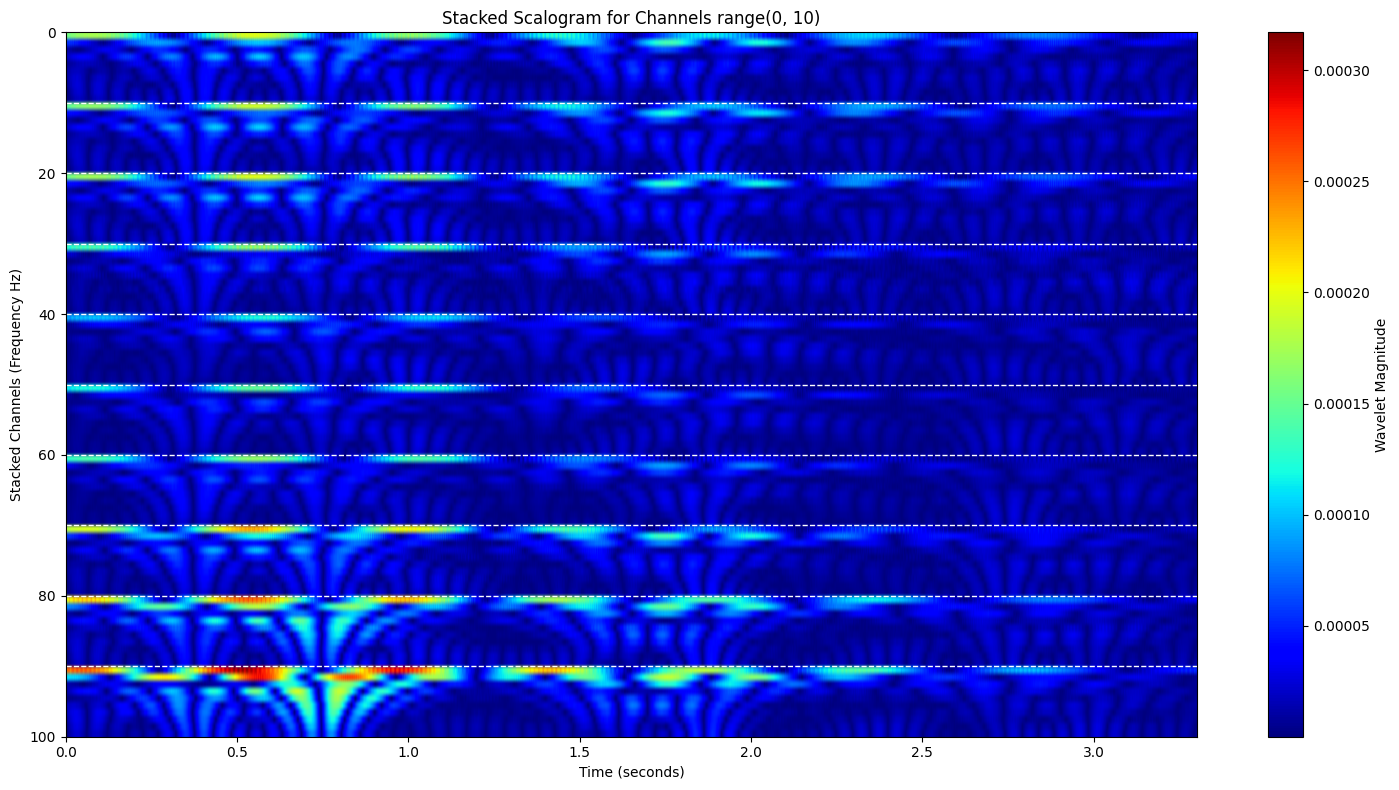

In [7]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ONCE ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to ensure the shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Define CWT Parameters ONCE ---
sfreq = 500
wavelet_name = 'morl'
frequencies_to_plot = np.linspace(1, 10, 10)
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 3. Compute scalograms for the first 3 channels and collect them ---
list_of_scalograms = []
channels_to_plot = range(0, 10)  # You can change this to plot specific channels, e.g., [0, 1, 2]

for channel_idx in channels_to_plot:
    signal = signal_matrix[channel_idx]
    print(f"Processing Channel {channel_idx}...")
    
    # Compute the CWT for the current channel
    coeffs, _ = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
    
    # Get the magnitude (the scalogram) and add it to our list
    scalogram = np.abs(coeffs)
    list_of_scalograms.append(scalogram)

# --- 4. Stack the 3 scalograms vertically into a single image ---
stacked_scalogram = np.vstack(list_of_scalograms)
print(f"Shape of the final stacked scalogram: {stacked_scalogram.shape}")

# --- 5. Plot the final stacked image ---
plt.figure(figsize=(15, 8))
plt.imshow(
    stacked_scalogram,  # Plot the single stacked image
    extent=[0, signal_matrix.shape[1]/sfreq, len(channels_to_plot) * frequencies_to_plot[-1], 0],
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Stacked Channels (Frequency Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Stacked Scalogram for Channels {channels_to_plot}')

# Add lines to separate the channels
num_freqs = len(frequencies_to_plot)
for i in range(1, len(channels_to_plot)):
    plt.axhline(y=i * num_freqs, color='w', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

Full signal matrix shape: (125, 1651)
Processing Channel 0...
Processing Channel 1...
Processing Channel 2...
Processing Channel 3...
Processing Channel 4...
Processing Channel 5...
Processing Channel 6...
Processing Channel 7...
Processing Channel 8...
Processing Channel 9...
Processing Channel 10...
Processing Channel 11...
Processing Channel 12...
Processing Channel 13...
Processing Channel 14...
Processing Channel 15...
Processing Channel 16...
Processing Channel 17...
Processing Channel 18...
Processing Channel 19...
Processing Channel 20...
Processing Channel 21...
Processing Channel 22...
Processing Channel 23...
Processing Channel 24...
Processing Channel 25...
Processing Channel 26...
Processing Channel 27...
Processing Channel 28...
Processing Channel 29...
Processing Channel 30...
Processing Channel 31...
Processing Channel 32...
Processing Channel 33...
Processing Channel 34...
Processing Channel 35...
Processing Channel 36...
Processing Channel 37...
Processing Channel 38.

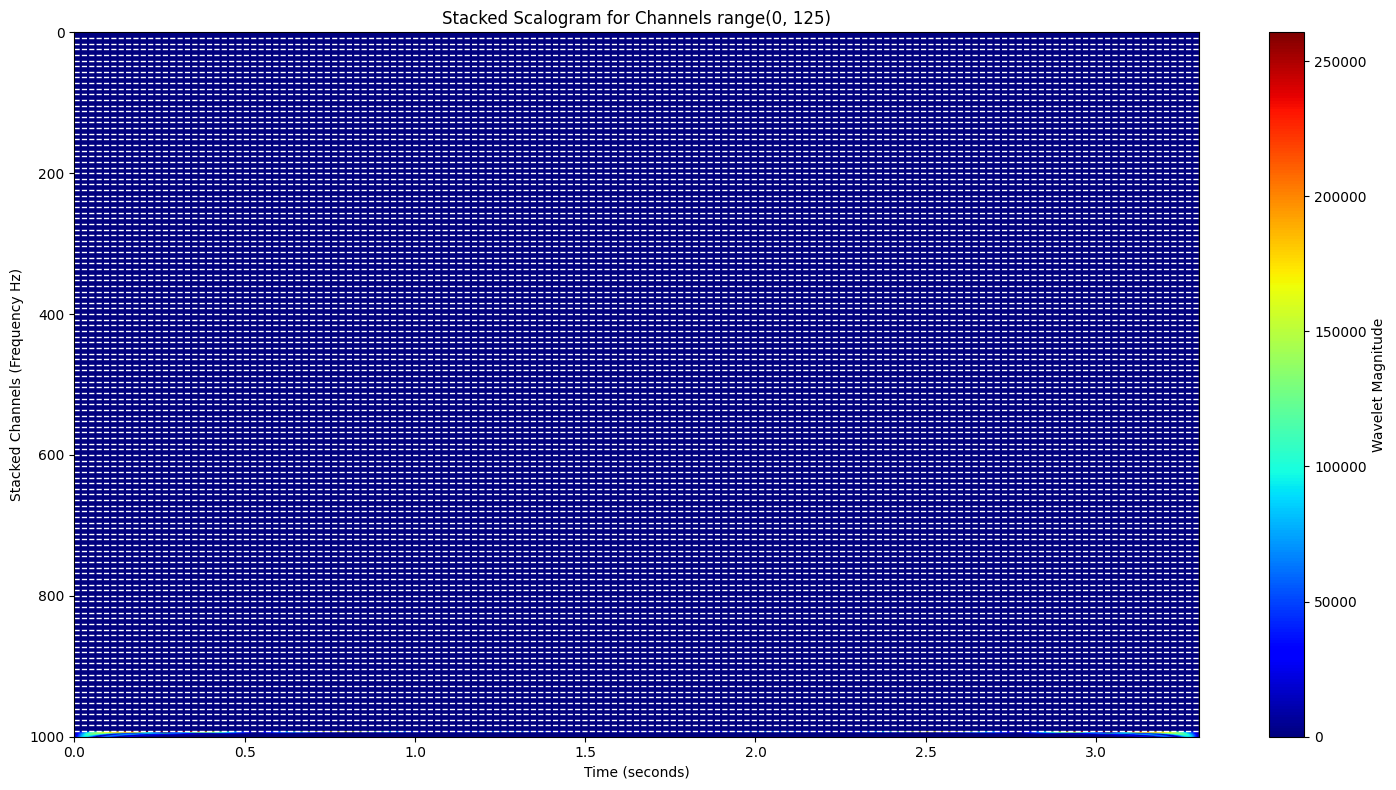

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ONCE ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to ensure the shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Define CWT Parameters ONCE ---
sfreq = 500
wavelet_name = 'morl'
frequencies_to_plot = np.linspace(1, 8, 8)
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 3. Compute scalograms for the first 3 channels and collect them ---
list_of_scalograms = []
channels_to_plot = range(0, 125)  # You can change this to plot specific channels, e.g., [0, 1, 2]

for channel_idx in channels_to_plot:
    signal = signal_matrix[channel_idx]
    print(f"Processing Channel {channel_idx}...")
    
    # Compute the CWT for the current channel
    coeffs, _ = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
    
    # Get the magnitude (the scalogram) and add it to our list
    scalogram = np.abs(coeffs)
    list_of_scalograms.append(scalogram)

# --- 4. Stack the 3 scalograms vertically into a single image ---
stacked_scalogram = np.vstack(list_of_scalograms)
print(f"Shape of the final stacked scalogram: {stacked_scalogram.shape}")

# --- 5. Plot the final stacked image ---
plt.figure(figsize=(15, 8))
plt.imshow(
    stacked_scalogram,  # Plot the single stacked image
    extent=[0, signal_matrix.shape[1]/sfreq, len(channels_to_plot) * frequencies_to_plot[-1], 0],
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Stacked Channels (Frequency Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Stacked Scalogram for Channels {channels_to_plot}')

# Add lines to separate the channels
num_freqs = len(frequencies_to_plot)
for i in range(1, len(channels_to_plot)):
    plt.axhline(y=i * num_freqs, color='w', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

In [11]:
print(stacked_scalogram.shape)
print(stacked_scalogram[0 :10, 0:10])  # Print the first 10 rows and columns of the stacked scalogram


(100, 1651)
[[1.48705916e-04 1.56247626e-04 1.57873772e-04 1.53828778e-04
  1.57019070e-04 1.55792015e-04 1.54897724e-04 1.62521633e-04
  1.60939716e-04 1.59660679e-04]
 [5.33373022e-05 5.73911688e-05 5.37026974e-05 5.17053598e-05
  5.67102986e-05 5.40881491e-05 5.00456277e-05 5.49404187e-05
  5.03859012e-05 4.93698517e-05]
 [8.18417295e-06 1.25969003e-05 9.39351625e-06 1.01445677e-05
  8.83001215e-06 8.61630846e-06 8.73032614e-06 6.55075373e-06
  8.80627732e-06 4.76144430e-06]
 [1.50288668e-05 1.55333507e-05 1.93967472e-05 1.91637427e-05
  1.92935406e-05 2.17458970e-05 2.23936386e-05 2.37776125e-05
  2.60446620e-05 2.60855464e-05]
 [1.58788415e-06 3.89696208e-06 5.75525346e-06 5.47070722e-06
  6.63077286e-06 6.49805937e-06 8.69605765e-06 1.02394604e-05
  9.73634318e-06 1.02878421e-05]
 [7.02947922e-06 8.78099570e-06 1.09296473e-05 1.17580924e-05
  1.11895246e-05 1.17790789e-05 1.34857568e-05 1.51740349e-05
  1.52249664e-05 1.62270356e-05]
 [7.07993087e-06 7.67214073e-06 1.05502459e-05

Full signal matrix shape: (125, 1651)
Shape of the final stacked scalogram: (1250, 1651)


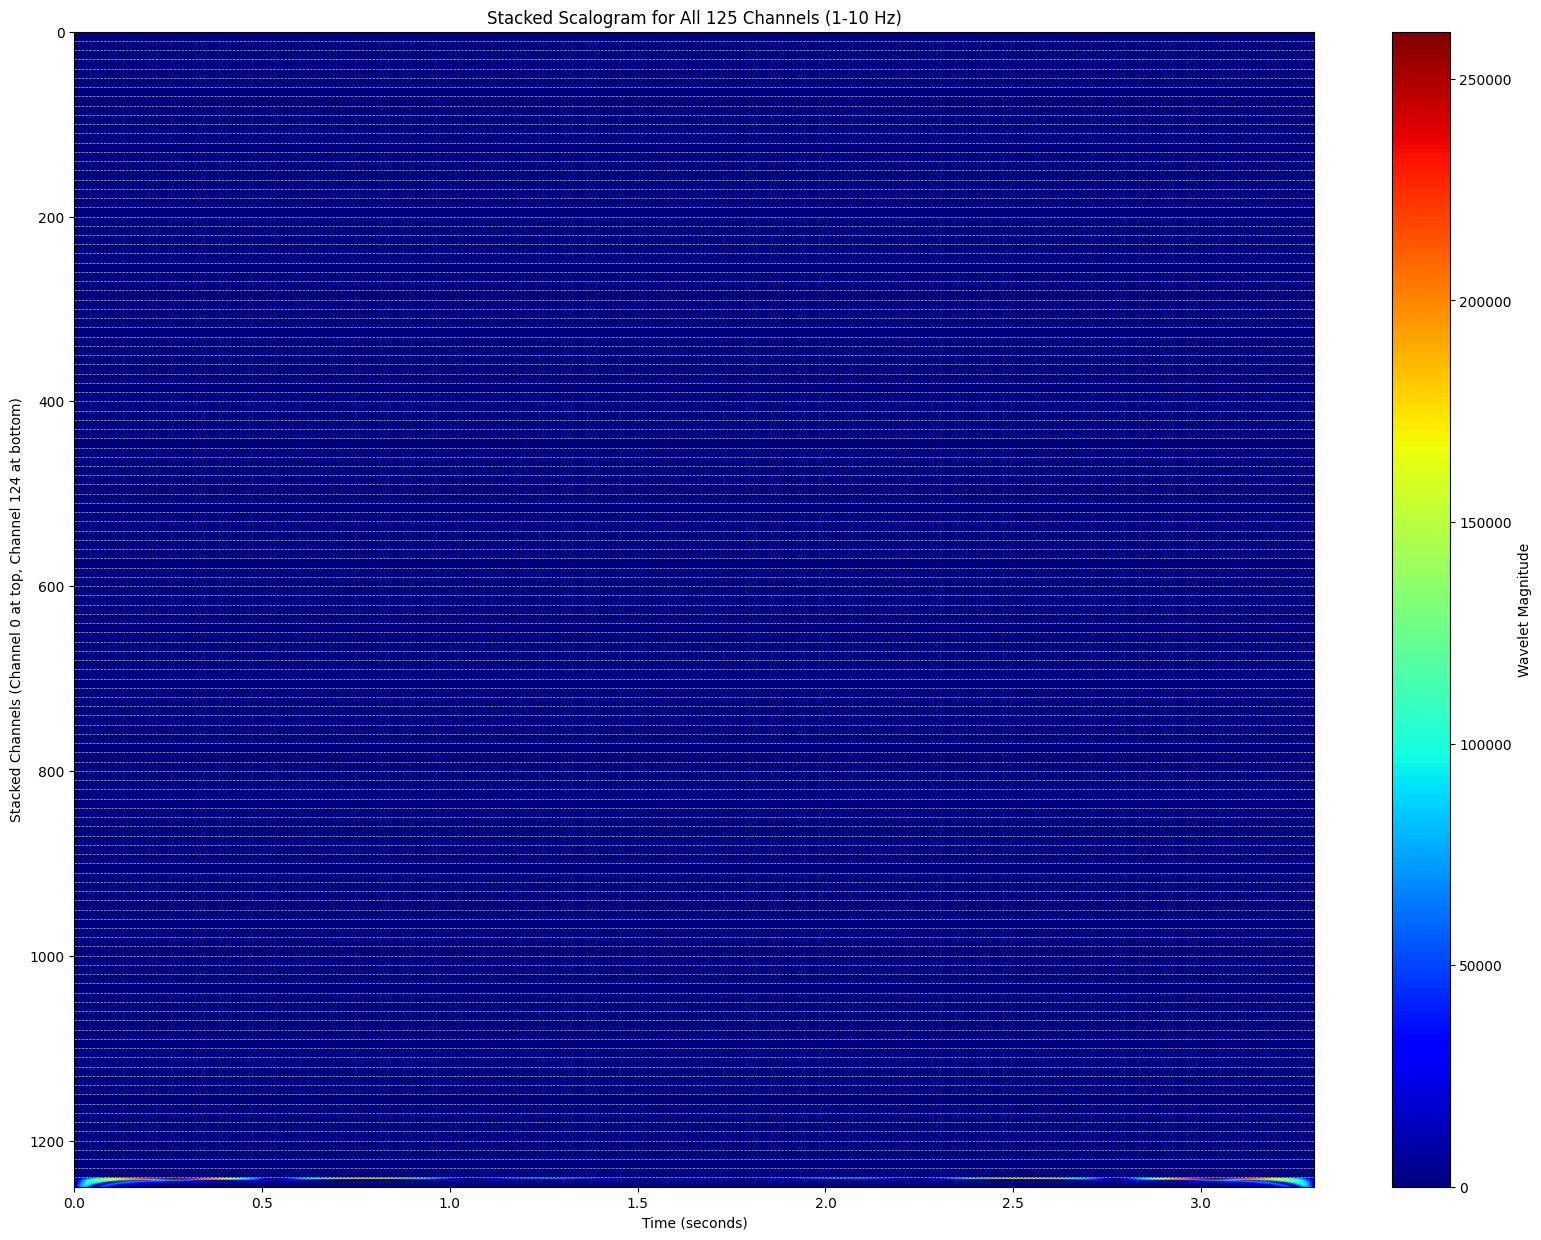

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ONCE ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to ensure the shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)

# --- 2. Define CWT Parameters ONCE ---
sfreq = 500
wavelet_name = 'morl'
frequencies_to_plot = np.linspace(1, 10, 10)
scales = pywt.central_frequency(wavelet_name) * sfreq / frequencies_to_plot

# --- 3. Compute scalograms for ALL 125 channels and collect them ---
list_of_scalograms = []
# Process all channels from 0 to 124
channels_to_plot = range(signal_matrix.shape[0]) 

for channel_idx in channels_to_plot:
    signal = signal_matrix[channel_idx]
    
    # Compute the CWT for the current channel
    coeffs, _ = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
    
    # Get the magnitude (the scalogram) and add it to our list
    scalogram = np.abs(coeffs)
    list_of_scalograms.append(scalogram)

# --- 4. Stack all 125 scalograms vertically into a single image ---
stacked_scalogram = np.vstack(list_of_scalograms)
print(f"Shape of the final stacked scalogram: {stacked_scalogram.shape}")

# --- 5. Plot the final stacked image ---
plt.figure(figsize=(20, 15))
plt.imshow(
    stacked_scalogram,  # Plot the single stacked image
    extent=[0, signal_matrix.shape[1]/sfreq, stacked_scalogram.shape[0], 0],
    aspect='auto',
    cmap='jet'
)
plt.colorbar(label='Wavelet Magnitude')
plt.ylabel('Stacked Channels (Channel 0 at top, Channel 124 at bottom)')
plt.xlabel('Time (seconds)')
plt.title('Stacked Scalogram for All 125 Channels (1-10 Hz)')

# Add lines to separate the channels
num_freqs = len(frequencies_to_plot)
for i in range(1, len(channels_to_plot)):
    plt.axhline(y=i * num_freqs, color='w', linestyle='--', linewidth=0.5, alpha=0.7)

In [7]:
# --- 1. Load the multi-channel signal ONCE ---
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-026_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)

# Squeeze to ensure the shape is (channels, samples)
signal_matrix = np.squeeze(trials[0]['input_features'])
print("Full signal matrix shape:", signal_matrix.shape)
print(trials[0]['text'])
print(len(trials))


Full signal matrix shape: (125, 1651)
我来自广州
132


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- 1. Define Paths and Parameters ---
# Use the same output root as your preprocessing script
PROCESSED_DATA_ROOT = Path("./Chisco/derivatives/scalogram_images_1-8Hz")
SUBJECT_ID = "01" # The subject you want to check
TRIAL_INDEX = 0   # The trial number you want to inspect (e.g., 0 for the first one)

# --- 2. Construct the file paths ---
subject_path = PROCESSED_DATA_ROOT / f"sub-{SUBJECT_ID}"
image_path = subject_path / "images" / f"trial_{TRIAL_INDEX:04d}.npy"
labels_path = subject_path / "labels.npy"
print(f"Checking for image at: {image_path}")
print(f"Checking for labels at: {labels_path}")
print(f"Subject Path: {subject_path}")
# --- 3. Load the Data ---
try:
    # Load the single image file
    image = np.load(image_path)
    
    # Load the entire labels file
    all_labels = np.load(labels_path)
    
    # Get the specific label for the trial we are inspecting
    label = all_labels[TRIAL_INDEX]
    
    print(f"Successfully loaded image: {image_path}")
    print(f"Image shape: {image.shape}")
    print(f"Corresponding Label: '{label}'")

    # --- 4. Visualize the Loaded Image ---
    plt.figure(figsize=(15, 10))
    plt.imshow(image, aspect='auto', cmap='jet')
    plt.colorbar(label='Wavelet Magnitude')
    plt.title(f"Verification of Saved Image\nTrial: {TRIAL_INDEX}, Label: '{label}'")
    plt.xlabel("Time Steps")
    plt.ylabel("Stacked Channels & Frequencies")
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find the processed files.")
    print(f"Checked for image at: {image_path}")
    print("Please make sure you have run preprocess_data.py successfully.")


Checking for image at: Chisco/derivatives/scalogram_images_1-8Hz/sub-01/images/trial_0000.npy
Checking for labels at: Chisco/derivatives/scalogram_images_1-8Hz/sub-01/labels.npy
Subject Path: Chisco/derivatives/scalogram_images_1-8Hz/sub-01
Error: Could not find the processed files.
Checked for image at: Chisco/derivatives/scalogram_images_1-8Hz/sub-01/images/trial_0000.npy
Please make sure you have run preprocess_data.py successfully.


Attempting to load image: Chisco/derivatives/scalogram_images_1-8Hz/sub-01/images/trial_0000.npy
Attempting to load labels: Chisco/derivatives/scalogram_images_1-8Hz/sub-01/labels.npy

--- Success! ---
Image shape: (1000, 1651)
Corresponding Label: '加拿大真是个好地方'


/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25343 (\N{CJK UNIFIED IDEOGRAPH-62FF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2

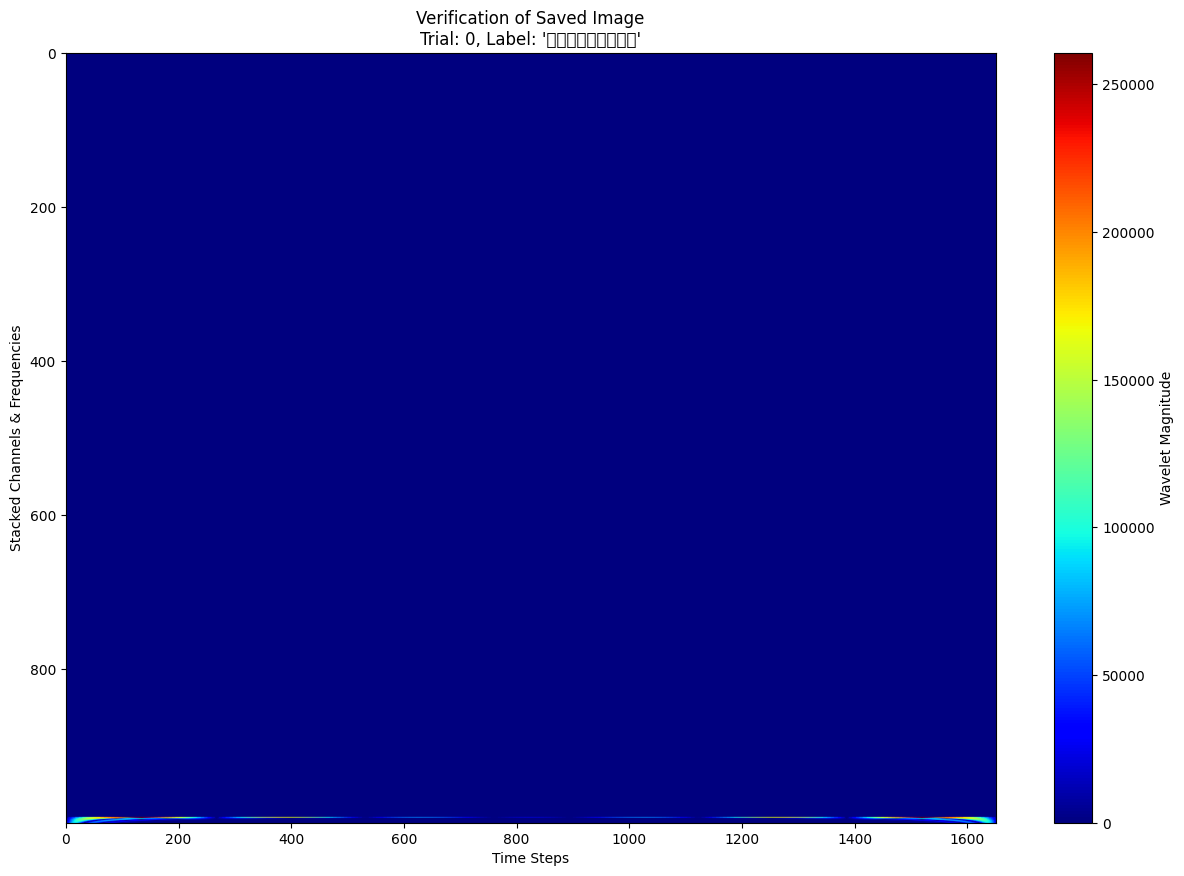

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Define the exact, absolute paths you want to check ---
image_path = Path("./Chisco/derivatives/scalogram_images_1-8Hz/sub-01/images/trial_0000.npy")
labels_path = Path("./Chisco/derivatives/scalogram_images_1-8Hz/sub-01/labels.npy")
TRIAL_INDEX = 0

print(f"Attempting to load image: {image_path}")
print(f"Attempting to load labels: {labels_path}")

# --- Load and Visualize the Data ---
try:
    image = np.load(image_path)
    all_labels = np.load(labels_path)
    label = all_labels[TRIAL_INDEX]
    
    print("\n--- Success! ---")
    print(f"Image shape: {image.shape}")
    print(f"Corresponding Label: '{label}'")

    plt.figure(figsize=(15, 10))
    plt.imshow(image, aspect='auto', cmap='jet')
    plt.colorbar(label='Wavelet Magnitude')
    plt.title(f"Verification of Saved Image\nTrial: {TRIAL_INDEX}, Label: '{label}'")
    plt.xlabel("Time Steps")
    plt.ylabel("Stacked Channels & Frequencies")
    plt.show()

except FileNotFoundError:
    print("\n--- Error ---")
    print(f"Could not find the file: {image_path}")
    print("This means the file has not been created yet.")
    print("Please run the `preprocess_data.py` script successfully to generate the files.")


In [17]:
print(image)  # Print the first 10 rows and columns of the image

[[6.24330596e-07 1.24554163e-06 4.85794999e-06 ... 3.66490567e-05
  2.79688902e-05 3.42690546e-05]
 [9.07372907e-07 9.87506155e-07 2.59364720e-06 ... 4.04504181e-06
  3.99199143e-06 4.62495291e-06]
 [4.23455867e-06 5.24838924e-06 5.76584307e-06 ... 1.31944425e-05
  1.20507648e-05 1.18668140e-05]
 ...
 [2.50888133e+00 8.39209473e+03 1.67333477e+04 ... 2.49733047e+04
  1.67383652e+04 8.39711230e+03]
 [2.32277274e+00 7.76957031e+03 2.31161426e+04 ... 2.31207871e+04
  1.54967148e+04 7.77421582e+03]
 [2.17275500e+00 1.44915039e+04 2.16231719e+04 ... 2.16275176e+04
  1.44958496e+04 7.27211279e+03]]


Attempting to load image: Chisco/derivatives/scalogram_images_1-8Hz/sub-01/images/trial_0000.npy

--- Success! ---
Image shape: (1000, 1651)
Corresponding Label: '加拿大真是个好地方'


/tmp/ipykernel_11983/2790997938.py:37: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  plt.savefig(output_filepath, bbox_inches='tight')
/tmp/ipykernel_11983/2790997938.py:37: UserWarning: Glyph 25343 (\N{CJK UNIFIED IDEOGRAPH-62FF}) missing from font(s) DejaVu Sans.
  plt.savefig(output_filepath, bbox_inches='tight')
/tmp/ipykernel_11983/2790997938.py:37: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.savefig(output_filepath, bbox_inches='tight')
/tmp/ipykernel_11983/2790997938.py:37: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.savefig(output_filepath, bbox_inches='tight')
/tmp/ipykernel_11983/2790997938.py:37: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  plt.savefig(output_filepath, bbox_inches='tight')
/tmp/ipykernel_11983/2790997938.py:37: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOG


Plot saved to: verification_plots/verification_sub-01_trial-0000.png


/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25343 (\N{CJK UNIFIED IDEOGRAPH-62FF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/masuma/Desktop/Bisal_2

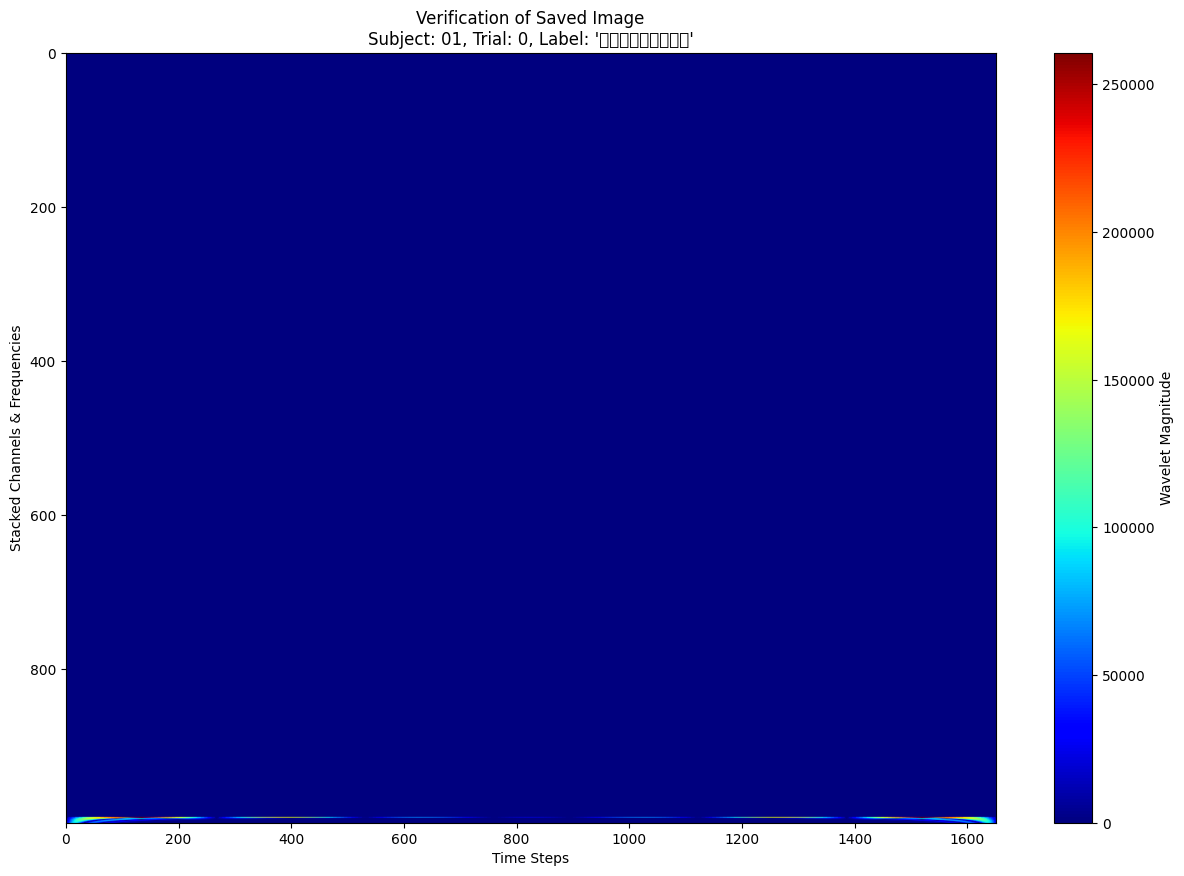

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- 1. Define Paths and Parameters ---
image_path = Path("./Chisco/derivatives/scalogram_images_1-8Hz/sub-01/images/trial_0000.npy")
labels_path = Path("./Chisco/derivatives/scalogram_images_1-8Hz/sub-01/labels.npy")
TRIAL_INDEX = 0
SUBJECT_ID = "01" # Manually set for the filename

# --- 2. Define Output Directory for the Plot ---
output_plot_dir = Path("./verification_plots")
output_plot_dir.mkdir(parents=True, exist_ok=True) # Create folder if it doesn't exist

print(f"Attempting to load image: {image_path}")

# --- 3. Load, Visualize, and Save the Plot ---
try:
    image = np.load(image_path)
    all_labels = np.load(labels_path)
    label = all_labels[TRIAL_INDEX]
    
    print("\n--- Success! ---")
    print(f"Image shape: {image.shape}")
    print(f"Corresponding Label: '{label}'")

    plt.figure(figsize=(15, 10))
    plt.imshow(image, aspect='auto', cmap='jet')
    plt.colorbar(label='Wavelet Magnitude')
    plt.title(f"Verification of Saved Image\nSubject: {SUBJECT_ID}, Trial: {TRIAL_INDEX}, Label: '{label}'")
    plt.xlabel("Time Steps")
    plt.ylabel("Stacked Channels & Frequencies")
    
    # --- SAVE THE FIGURE TO A FILE ---
    output_filename = f"verification_sub-{SUBJECT_ID}_trial-{TRIAL_INDEX:04d}.png"
    output_filepath = output_plot_dir / output_filename
    plt.savefig(output_filepath, bbox_inches='tight')
    print(f"\nPlot saved to: {output_filepath}")
    
    plt.show() # Display the plot in the notebook

except FileNotFoundError:
    print("\n--- Error ---")
    print(f"Could not find the file: {image_path}")
    print("Please run the `preprocess_data.py` script successfully to generate the files.")